The Sparks Foundation - Data Science & Business Analytics Internship
Task 1 - Prediction using Supervised Machine Learning



Author - SOWJANYA NAGULAPATI


Predicting the marks of a student based on the no of study hours (9.25 hours/day)
#GRIP NOVEMBER 2022

In [33]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Import Data")

df.head(15)

Import Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
#Checking the shape of our dataset
df.shape

(25, 2)

In [7]:
#Checking the info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#To check description of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data Visualization

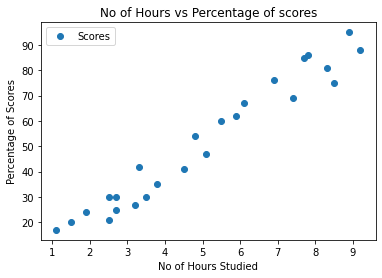

In [9]:
#Plotting the data
df.plot(x='Hours', y='Scores', style='o')
plt.title('No of Hours vs Percentage of scores')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage of Scores')  
plt.show()

Plotting the same data with Scatter plot

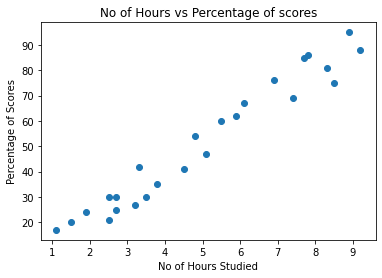

In [14]:
#Plotting the data
plt.scatter(x='Hours', y='Scores', data=df)
plt.title('No of Hours vs Percentage of scores')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage of Scores')  
plt.show()

From the above two Graphs we have to conclude that if the No of hours studied increases then the percentage of Scores also Increases.

Now we have to prepare the data for our model

In [16]:
x= df.iloc[:, :-1].values
y= df.iloc[:, :1].values

In [21]:
from sklearn.model_selection import train_test_split
x= df['Hours']
y=df['Scores']
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=0)

Preparation of data for our model completed and the Next step is Training.

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train.array.reshape(-1,1), y_train)
print("Completed Training ")

Completed Training 


plotting the regreesiion line.

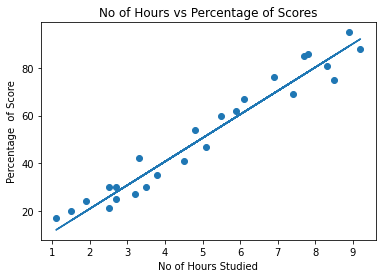

In [24]:
#Plotting the regression line
reg_line = reg.coef_*x+reg.intercept_
#Plotting for the test data
plt.scatter(x, y)
plt.plot(x, reg_line);
plt.title('No of Hours vs Percentage of Scores')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage  of Score')
plt.show()

Testing the Model

In [26]:
print(x_test)
print("Prediction of Score")
y_predict=reg.predict(x_test.array.reshape(-1,1))
y_predict

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
Name: Hours, dtype: float64
Prediction of Score


array([15.9477618 , 32.77394723, 74.344523  , 25.84551793, 59.49788879,
       38.71260091, 19.90686425, 78.30362545, 69.39564493, 11.98865934])

Checking the Accuracy of our Model

In [27]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_predict})
print(df) 
print("The accuracy of model is:" ,reg.score(x_train.array.reshape(-1,1),y_train))

    Actual  Predicted
5       20  15.947762
2       27  32.773947
19      69  74.344523
16      30  25.845518
11      62  59.497889
22      35  38.712601
17      24  19.906864
24      86  78.303625
23      76  69.395645
14      17  11.988659
The accuracy of model is: 0.9440108159733135


In [28]:
#Predicting the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a day', reg.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [92.65537185]


Model Evaluation

In [36]:
#Checking The Model Efficacy

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict)) 
print('Mean Square Error:', mean_squared_error(y_test, y_predict)) 

Mean Absolute Error: 4.8945108634106065
Mean Square Error: 26.034569687682232
